<a href="https://colab.research.google.com/github/Jakub-Pawinski-PP/WdSI_projekt/blob/main/road_signs_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#podłączenie dysku Google oraz instalacja biblioteki Detecto
import os
from google.colab import drive

drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/WdSI_projekt/train')

!pip install detecto

Mounted at /content/drive


In [3]:
#wyszukanie typu obiektu w pliku .xml
from os import listdir
import glob
import xml.etree.ElementTree as ET

files = glob.glob('road0.xml')

for file in files:

  with open(file, 'r', encoding = "utf-8") as content:

    tree = ET.parse(content)
    
    last_datafile = tree.findall('object')

    for datafile in last_datafile:
      print(datafile.find('name').text)

In [5]:
#import funkcji z biblioteki Detecto, podanie ścieżki treningowej oraz słów kluczowych, trenowanie zbioru
from detecto import core, utils, visualize

dataset = core.Dataset('images/')
model = core.Model(['speedlimit', 'crosswalk', 'stop', 'trafficlight'])

model.fit(dataset, epochs=5)

Epoch 1 of 5
Begin iterating over training dataset


100%|██████████| 877/877 [11:07<00:00,  1.31it/s]


Epoch 2 of 5
Begin iterating over training dataset


100%|██████████| 877/877 [11:06<00:00,  1.32it/s]


Epoch 3 of 5
Begin iterating over training dataset


100%|██████████| 877/877 [11:07<00:00,  1.31it/s]


Epoch 4 of 5
Begin iterating over training dataset


100%|██████████| 877/877 [11:08<00:00,  1.31it/s]


Epoch 5 of 5
Begin iterating over training dataset


100%|██████████| 877/877 [11:07<00:00,  1.31it/s]


In [6]:
#wywołanie obrazu ze zbioru treningowego celem sprawdzenia możliwości oznaczenia znaków
image = utils.read_image('images/road874.png')
predictions = model.predict(image)

labels, boxes, scores = predictions

print(labels)
print(boxes)
print(scores)

['speedlimit', 'speedlimit', 'stop']
tensor([[ 92.5334, 128.7986, 136.2931, 172.9451],
        [ 83.7859, 205.5405,  96.0115, 217.8291],
        [191.2869, 224.5699, 204.4286, 239.6133]])
tensor([0.9988, 0.9925, 0.9858])


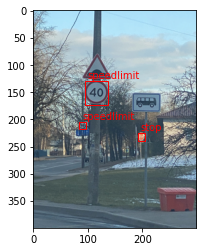

In [87]:
visualize.show_labeled_image(image, boxes, labels)

In [13]:
#wywołanie obrazu ze zbioru testowego celem sprawdzenia możliwości oznaczenia znaków
image_val = utils.read_image('validation_images/road2136.jpg')
predictions_val = model.predict(image_val)

labels, boxes, scores = predictions_val

print(labels) 
print(boxes)
print(scores)

['speedlimit', 'speedlimit', 'speedlimit']
tensor([[265.7986,   4.7120, 497.7653, 247.2362],
        [263.5599, 230.5749, 524.2538, 532.0000],
        [342.1534, 390.6975, 369.6192, 426.7074]])
tensor([0.9976, 0.9874, 0.0578])


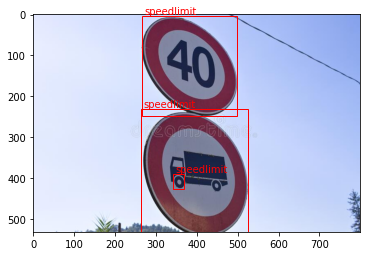

In [14]:
visualize.show_labeled_image(image_val, boxes, labels)